# Cryptocurrency
## Finance And Banking

### Bitcoin and Cryptocurrencies
<p>Since the launch of Bitcoin in 2008, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future. In fact, on the 6th of December of 2017, Bitcoin has a market capitalization above $200 billion.

It surged to unprecedented highs, sparking global interest and establishing itself as a prominent digital asset.

The cryptocurrency market is exceptionally volatile and any money you put in might disappear into thin air.
<p><center>
<img src="https://assets.datacamp.com/production/project_82/img/bitcoint_market_cap_2017.png" style="width:500px"> <br>
<em>The astonishing increase of Bitcoin market capitalization in 2017.</em></center></p>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

data_set = 'datasets/coinmarketcap_06122017.csv'

dec6 = pd.read_csv(data_set)
market_cap_raw = dec6[['id', 'market_cap_usd']]

nbr = market_cap_raw.count()
print(nbr)

id                1326
market_cap_usd    1031
dtype: int64


In [29]:
dec6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1326 non-null   int64  
 1   24h_volume_usd      1270 non-null   float64
 2   available_supply    1031 non-null   float64
 3   id                  1326 non-null   object 
 4   last_updated        1326 non-null   int64  
 5   market_cap_usd      1031 non-null   float64
 6   max_supply          215 non-null    float64
 7   name                1326 non-null   object 
 8   percent_change_1h   1273 non-null   float64
 9   percent_change_24h  1270 non-null   float64
 10  percent_change_7d   1283 non-null   float64
 11  price_btc           1326 non-null   float64
 12  price_usd           1326 non-null   float64
 13  rank                1326 non-null   int64  
 14  symbol              1326 non-null   object 
 15  total_supply        1211 non-null   float64
dtypes: flo

In [30]:
dec6.isnull().sum()

Unnamed: 0               0
24h_volume_usd          56
available_supply       295
id                       0
last_updated             0
market_cap_usd         295
max_supply            1111
name                     0
percent_change_1h       53
percent_change_24h      56
percent_change_7d       43
price_btc                0
price_usd                0
rank                     0
symbol                   0
total_supply           115
dtype: int64

### Adding new column BTC-USD price to the dataset

The BTC-USD price is crucial because Bitcoin is the first and most influential cryptocurrency, serving as a benchmark for the entire market. Its significant market capitalization means that its price movements greatly impact other cryptocurrencies.
This trading pair is highly liquid, allowing for large trades with minimal price impact, making it attractive to traders and investors.

In [31]:
btc_usd_price = pd.read_csv('btc_usd_price.csv')
dec6['btc-usd-price']= btc_usd_price
btc_usd = btc_usd_price.squeeze()
btc_usd

0        457.334015
1        424.440002
2        394.795990
3        408.903992
4        398.821014
           ...     
1320    9419.080078
1321    9240.549805
1322    9119.009766
1323    9235.919922
1324    9743.860352
Name: BTC-USD Price, Length: 1325, dtype: float64

In [32]:
btc_usd.min()

178.1029968

In [33]:
max(btc_usd)

19497.40039

### It needs to be sorted

Sorting a dataset improves algorithm efficiency, enhances data analysis by revealing trends and outliers, aids in maintaining data integrity, and makes data easier to read and interpret. Some algorithms also require sorted data to function correctly.




In [34]:
btc_usd.sort_values()

119       178.102997
122       199.259995
121       208.097000
120       209.843994
123       210.339004
            ...     
1189    17776.699220
1177    17899.699220
1188    19114.199220
1187    19140.800780
1186    19497.400390
Name: BTC-USD Price, Length: 1325, dtype: float64

In [35]:
1324 in btc_usd.index

True

### Discard the cryptocurrencies without a market capitalization

<p>The <code>count()</code> for <code>id</code> and <code>market_cap_usd</code> differ above because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by <code>NaN</code> in the data, and <code>NaN</code>s are not counted by <code>count()</code>. These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.</p>

In [36]:
cap = market_cap_raw.query('market_cap_usd > 0')
nb = market_cap_raw.count()
print(nb)

id                1326
market_cap_usd    1031
dtype: int64


### Comparing the most two known coins

Bitcoin and Ethereum are the most prominent cryptocurrencies.
they use blockchain technology for secure, transparent transactions. Both originally used proof-of-work for consensus, though Ethereum is transitioning to proof-of-stake. They are foundational assets in the cryptocurrency market, widely recognized and traded on major exchanges.

while Bitcoin is predominantly viewed as a digital asset and store of value in the financial market, Ethereum's utility extends to powering decentralized applications and enabling complex transactions through smart contracts, positioning it as a platform for innovation beyond traditional financial applications.

In [37]:
BTC = dec6.iloc[0]
ETH = dec6.iloc[1]
comp = pd.concat([BTC, ETH], axis=1)
comp.drop(comp.index[0], inplace=True)
comp.columns = ['BTC', 'ETH']
comp

,BTC,ETH
24h_volume_usd,9007640000.0,1551330000.0
available_supply,16723525.0,96165368.0
id,bitcoin,ethereum
last_updated,1512549554,1512549553
market_cap_usd,213049346738.0,43529446198.0
max_supply,21000000.0,NaN
name,Bitcoin,Ethereum
percent_change_1h,0.12,-0.18
percent_change_24h,7.33,-3.93
percent_change_7d,17.45,-7.33


### How big is Bitcoin compared with the rest of the cryptocurrencies?

<p>At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.</p>

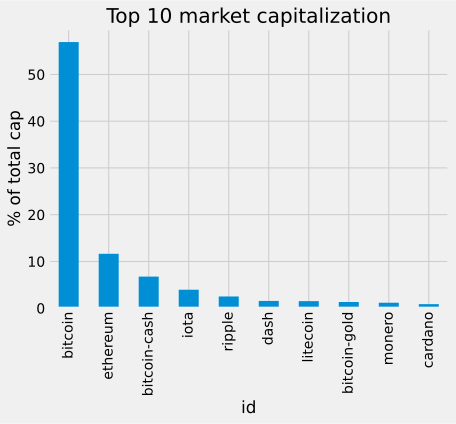

In [38]:
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

cap10 = cap.head(10).set_index('id')
cap10 = cap10.assign(market_cap_perc=lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()) * 100)
ax = cap10['market_cap_perc'].plot(kind='bar', title=TOP_CAP_TITLE)
ax.set_ylabel(TOP_CAP_YLABEL)

plt.show()

### Let's define a pandas series with custom index by top 10 coins

This custom-indexed Series provides a clear snapshot of the current market standings, enabling us to track the fluctuations and trends of these leading digital assets in real-time. Such structured data representation is essential for making informed investment decisions and understanding the dynamics of the cryptocurrency market.

In [39]:
crypto_list = ['BTC','ETH','BCH', 'MIOTA','XRP','DASH','LTC','BTG','XMR', 'ADA']
crypto_labels = ['Bitcoin', 'Ethereum', 'Bitcoin-Cash', 'Iota', 'Ripple','Dash', 'Litecoin', 'Bitcoin-Gold', 'Monero', 'Cardano']
crypto_series = pd.Series(data = crypto_list, index = crypto_labels)
crypto_series

Bitcoin           BTC
Ethereum          ETH
Bitcoin-Cash      BCH
Iota            MIOTA
Ripple            XRP
Dash             DASH
Litecoin          LTC
Bitcoin-Gold      BTG
Monero            XMR
Cardano           ADA
dtype: object

In [40]:
crypto_series.dtype

dtype('O')

### Making the plot easier to read and more informative

While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log<sup>10</sup> scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative.

For the colors rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin blockchain. Ethereum and Cardano both offer Turing Complete smart contracts.
Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color.

The bitcoin forks are actually <strong>very</strong> different, but it is out of scope to talk about them here.

Text(0.5, 0, 'coins name')

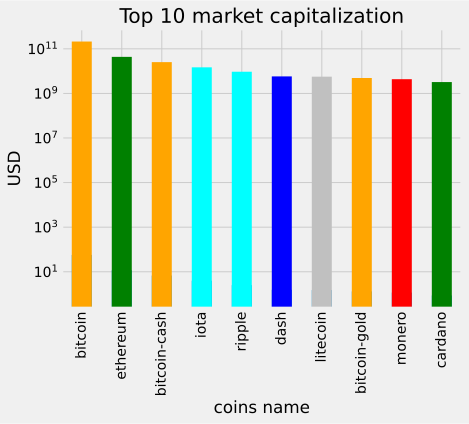

In [41]:
ax = cap10['market_cap_perc'].plot(kind='bar', title=TOP_CAP_TITLE)# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

ax = cap10.market_cap_usd.plot.bar(title=TOP_CAP_TITLE, logy=True, color = COLORS)
ax.set_ylabel('USD')
ax.set_xlabel('coins name')

### Bitcoins in the market

Highlighting all cryptocurrencies related to Bitcoin in the data is essential for comprehensive analysis due to Bitcoin's significant market influence.

Bitcoin's price influences the entire cryptocurrency market, guiding sentiment and strategies. Related cryptocurrencies reflect technological advances and regulatory trends, crucial for informed decisions and planning.

In [42]:
BITCOINS = dec6['name'].str.lower().str.startswith('bitcoin')
dec6[BITCOINS]

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply,btc-usd-price
0,0,9.007640e+09,16723525.0,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000e+00,12739.500000,1,BTC,16723525.0,457.334015
2,2,1.111350e+09,16840438.0,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,1.200500e-01,1502.090000,3,BCH,16840438.0,394.795990
7,7,1.384070e+08,16690974.0,bitcoin-gold,1512549582,4.920065e+09,2.100000e+07,Bitcoin Gold,-0.86,-8.65,-11.24,2.355880e-02,294.774000,8,BTG,16790974.0,423.204987
56,56,1.181740e+05,1288862.0,bitcoindark,1512549548,1.823676e+08,NaN,BitcoinDark,-0.49,-6.33,0.89,1.130850e-02,141.495000,57,BTCD,1288862.0,423.561005
319,319,1.382530e+05,103419.0,bitcoin-plus,1512549544,8.605334e+06,NaN,Bitcoin Plus,-2.03,-4.53,1.14,6.650180e-03,83.208700,320,XBC,103419.0,282.614014
390,390,1.653870e+06,14397076.0,bitcoin-red,1512549581,4.569085e+06,NaN,Bitcoin Red,2.77,-29.87,693.37,2.536000e-05,0.317362,391,BTCRED,21000000.0,245.307999
481,481,1.411940e+04,626100091.0,bitcoinz,1512549579,1.722332e+06,2.100000e+10,BitcoinZ,-4.12,-2.97,-9.10,2.200000e-07,0.002751,482,BTCZ,626100091.0,448.428009
605,605,6.024220e+04,4619502.0,bitcoinfast,1512549547,5.080210e+05,NaN,Bitcoin Fast,-11.68,7.97,53.20,8.790000e-06,0.109973,606,BCF,7635784.0,455.670990
610,610,5.940330e+03,16483650.0,bitcoin-scrypt,1512549544,4.792510e+05,NaN,Bitcoin Scrypt,-11.57,5.22,58.60,2.320000e-06,0.029074,611,BTCS,16483650.0,438.714996
651,651,1.095270e+03,793108.0,bitcoin-21,1512549554,2.549360e+05,NaN,Bitcoin 21,45.32,9.74,117.14,2.569000e-05,0.321440,652,XBTC21,7093108.0,639.890015


### Volatility in cryptocurrencies

<p>The cryptocurrencies market has been spectacularly volatile since the first exchange opened. This notebook didn't start with a big, bold warning for nothing. Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.</p>

In [43]:
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

volatility = volatility.set_index('id').dropna()
volatility = volatility.sort_values(by='percent_change_24h')

print(volatility.head())

               percent_change_24h  percent_change_7d
id                                                  
flappycoin                 -95.85             -96.61
credence-coin              -94.22             -95.31
coupecoin                  -93.93             -61.24
tyrocoin                   -79.02             -87.43
petrodollar                -76.55             542.96


In [44]:
volatility.loc["tyrocoin"]

percent_change_24h   -79.02
percent_change_7d    -87.43
Name: tyrocoin, dtype: float64

### That things are *a bit* crazy

<p>It seems you can lose a lot of money quickly on cryptocurrencies. Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.</p>

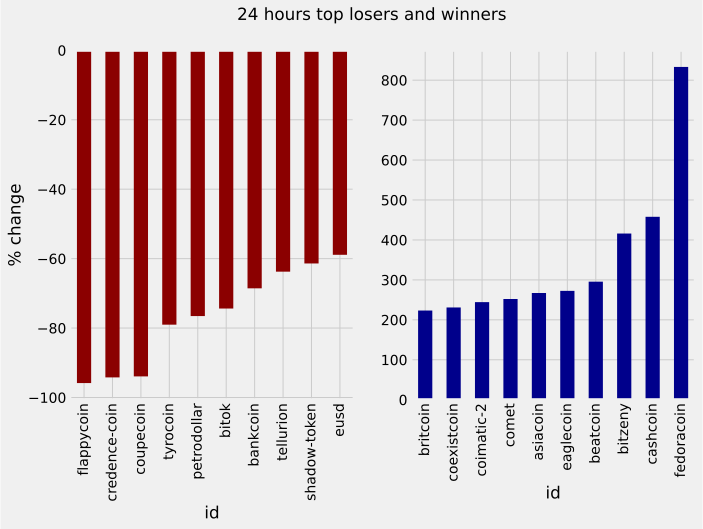

In [45]:
def top10_subplot(volatility_series, title):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    ax = volatility_series[:10].plot.bar(color='darkred',ax=axes[0])
    fig.suptitle(title)
    ax.set_ylabel('% change')
    ax = volatility_series[-10:].plot.bar(color='darkblue',ax=axes[1])
    return fig, ax

DTITLE = "24 hours top losers and winners"
fig, ax = top10_subplot(volatility.percent_change_24h ,DTITLE)

### Let's check the weekly Series too.

800% daily increase?! Why are we doing this tutorial and not buying random coins?
<p>After calming down, let's reuse the function defined above to see what is going weekly instead of daily.

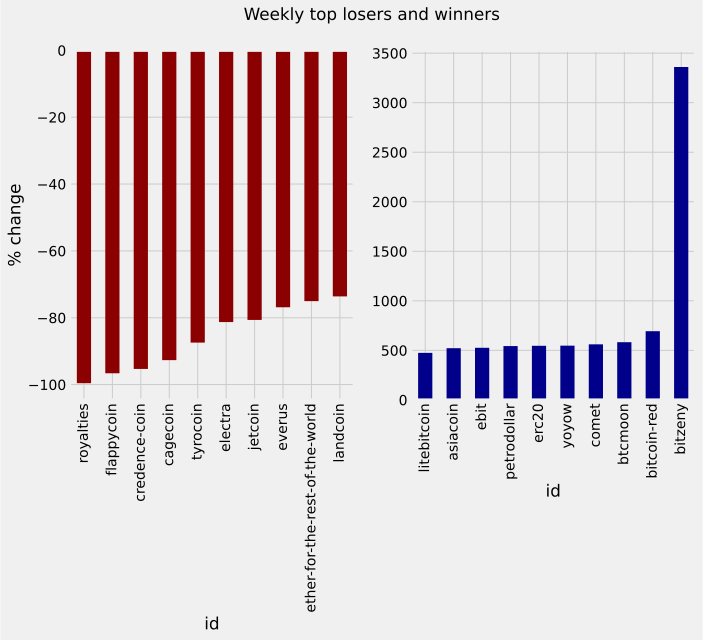

In [46]:
volatility7d = volatility.sort_values(by = 'percent_change_7d')
WTITLE = "Weekly top losers and winners"
fig, ax = top10_subplot(volatility7d['percent_change_7d'] , WTITLE)

### Understanding Market Movements With Timestamps

Timestamps of cryptocurrencies are essential for tracking historical price movements, analyzing market trends, and making informed trading decisions. They ensure data integrity, support technical analysis, and provide a temporal context for understanding cryptocurrency performance and market dynamics.

In [47]:
tm = pd.read_csv('time.csv')
id = dec6['id']
time = pd.concat([tm, id], axis=1)
full_data = pd.merge(dec6,time, on='id')
full_data = full_data.drop(full_data.columns[0], axis=1)
full_data

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply,btc-usd-price,Time
0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000e+00,12739.500000,1,BTC,1.672352e+07,457.334015,05:00:15
1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,3.617670e-02,452.652000,2,ETH,9.616537e+07,424.440002,00:41:59
2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,1.200500e-01,1502.090000,3,BCH,1.684044e+07,394.795990,23:43:37
3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,4.241800e-04,5.307460,4,MIOTA,2.779530e+09,408.903992,03:00:34
4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,1.932000e-05,0.241754,5,XRP,9.999309e+10,398.821014,03:40:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,NaN,NaN,turbocoin,1512368664,NaN,NaN,TurboCoin,NaN,NaN,8.12,1.000000e-08,0.000114,1322,TURBO,NaN,9240.549805,19:43:21
1322,NaN,NaN,birds,1512535772,NaN,NaN,Birds,NaN,10.62,-42.10,1.000000e-08,0.000122,1323,BIRDS,NaN,9119.009766,01:51:58
1323,NaN,NaN,bitcoincashscrypt,1512548078,NaN,NaN,BitcoinCashScrypt,-0.37,-37.39,-27.69,5.000000e-07,0.006202,1324,BCCS,2.502380e+06,9235.919922,23:02:20
1324,NaN,NaN,swisscoin,1512540278,NaN,NaN,Swisscoin,NaN,4.39,-22.84,1.000000e-08,0.000123,1325,SIC,1.020000e+10,9743.860352,18:25:56


In [48]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   24h_volume_usd      1270 non-null   float64
 1   available_supply    1031 non-null   float64
 2   id                  1326 non-null   object 
 3   last_updated        1326 non-null   int64  
 4   market_cap_usd      1031 non-null   float64
 5   max_supply          215 non-null    float64
 6   name                1326 non-null   object 
 7   percent_change_1h   1273 non-null   float64
 8   percent_change_24h  1270 non-null   float64
 9   percent_change_7d   1283 non-null   float64
 10  price_btc           1326 non-null   float64
 11  price_usd           1326 non-null   float64
 12  rank                1326 non-null   int64  
 13  symbol              1326 non-null   object 
 14  total_supply        1211 non-null   float64
 15  btc-usd-price       1325 non-null   float64
 16   Time 

In [49]:
full_data.columns = full_data.columns.str.upper()
full_data.columns = full_data.columns.str.strip()
full_data['TIME'] = pd.to_datetime(full_data['TIME'], format='%H:%M:%S')
bitcoin_time = full_data.iloc[0, 16]
bitcoin_time

Timestamp('1900-01-01 05:00:15')

In [50]:
h = bitcoin_time.hour
m = bitcoin_time.minute
s = bitcoin_time.second

print(f'Hour: {h}, Minute: {m}, Second: {s}')

Hour: 5, Minute: 0, Second: 15


### How small is small?

<p>The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones.
ryptocurrencies are a new asset class, so they are not directly comparable to stocks. Furthermore, there are no limits set in stone for what a "small" or "large" stock is. Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a commodity instead.

In [51]:
largecaps = cap.query("market_cap_usd > 1E+10")
print(largecaps)

             id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10


In [52]:
max_percent_change_1h = full_data.groupby('ID')['PERCENT_CHANGE_1H'].max()
print(max_percent_change_1h)

ID
0x            1.00
10mtoken     -0.12
1337coin      0.50
2give        -1.22
300-token     0.54
             ...  
zonecoin      0.52
zozocoin     -3.27
zrcoin        3.59
zsecoin        NaN
zurcoin      25.04
Name: PERCENT_CHANGE_1H, Length: 1326, dtype: float64


### The Power of PERCENT CHANGE 24H

The percentage change over the last 24 hours is pivotal in cryptocurrency
markets, offering a crucial snapshot of price movements over a 24-hour period. Positive values indicate price appreciation, signaling market optimism and potential growth opportunities for investors. This metric aids in assessing market sentiment, managing risks, and comparing cryptocurrency performance against benchmarks, guiding strategic investment decisions in the volatile cryptocurrency landscape.

In [53]:
positive_percentage = full_data[full_data['PERCENT_CHANGE_24H'] > 0]
positive_percentage

,24H_VOLUME_USD,AVAILABLE_SUPPLY,ID,LAST_UPDATED,MARKET_CAP_USD,MAX_SUPPLY,NAME,PERCENT_CHANGE_1H,PERCENT_CHANGE_24H,PERCENT_CHANGE_7D,PRICE_BTC,PRICE_USD,RANK,SYMBOL,TOTAL_SUPPLY,BTC-USD-PRICE,TIME
0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000e+00,12739.500000,1,BTC,1.672352e+07,457.334015,1900-01-01 05:00:15
3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,4.241800e-04,5.307460,4,MIOTA,2.779530e+09,408.903992,1900-01-01 03:00:34
6,4.093420e+08,5.415391e+07,litecoin,1512549542,5.634498e+09,8.400000e+07,Litecoin,-0.17,0.80,3.68,8.315530e-03,104.046000,7,LTC,5.415391e+07,435.790985,1900-01-01 21:36:32
8,5.498600e+08,1.544296e+07,monero,1512549544,4.331688e+09,NaN,Monero,-2.00,25.65,41.23,2.241770e-02,280.496000,9,XMR,1.544296e+07,411.574005,1900-01-01 21:36:03
12,2.490480e+08,5.199591e+08,eos,1512549570,2.567610e+09,NaN,EOS,2.26,29.56,69.66,3.946600e-04,4.938100,13,EOS,1.000000e+09,375.467011,1900-01-01 22:11:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,NaN,NaN,pinkdog,1512538164,NaN,NaN,PinkDog,NaN,3.71,-42.70,1.000000e-08,0.000122,1316,PDG,NaN,9697.500000,1900-01-01 04:24:02
1317,NaN,NaN,zsecoin,1512533665,NaN,NaN,ZSEcoin,NaN,3.85,-11.44,9.200000e-07,0.011249,1318,ZSE,6.768156e+06,9281.509766,1900-01-01 03:16:10
1320,NaN,NaN,picoin,1512545967,NaN,2.941134e+06,PiCoin,-0.09,9.79,NaN,2.200000e-07,0.002738,1321,PI,1.378369e+06,9419.080078,1900-01-01 12:51:57
1322,NaN,NaN,birds,1512535772,NaN,NaN,Birds,NaN,10.62,-42.10,1.000000e-08,0.000122,1323,BIRDS,NaN,9119.009766,1900-01-01 01:51:58


### Most coins are tiny

<p>Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.

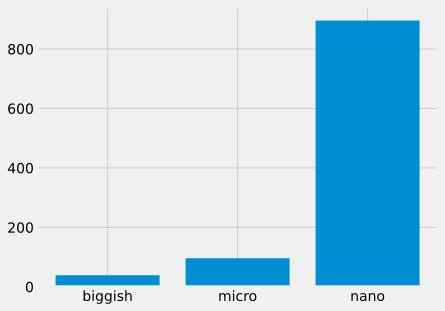

In [54]:
def capcount(query_string):
    return cap.query(query_string).count().id

LABELS = ["biggish", "micro", "nano"]

biggish = capcount("market_cap_usd > 3E+8")
micro = capcount("market_cap_usd >= 5E+7 & market_cap_usd < 3E+8")
nano =  capcount("market_cap_usd < 5E+7")

values = [biggish, micro, nano]

plt.bar(range(len(values)), values, tick_label=LABELS);

##Take care with your money, while the crypto market is attractive, it may not suit everyone's financial strategy.


<p><center>
<img src="https://assets.finbold.com/uploads/2023/01/Cryptocurrency-market-starts-2023-by-reclaiming-800-billion-market-cap.jpg" style="width:500px"> <br>
</center></p>

